# **Q1**

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

* Sales -- Unit sales (in thousands) at each location




* Competitor Price -- Price charged by competitor at each location

* Income -- Community income level (in thousands of dollars)

* Advertising -- Local advertising budget for company at each location (in thousands of dollars)

* Population -- Population size in region (in thousands)

* Price -- Price company charges for car seats at each site

* Shelf Location at stores -- A factor with levels Bad, Good and Medium 
indicating the quality of the shelving location for the car seats at each site

* Age -- Average age of the local population

* Education -- Education level at each location

* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
**Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis**


In [28]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [29]:
cd=pd.read_csv("/content/drive/MyDrive/Assignment/Company_Data.csv")

In [30]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [31]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [32]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [33]:
#Complete company data dataset
label_encoder = preprocessing.LabelEncoder() 
cd['US']= label_encoder.fit_transform(cd['Urban'])

In [34]:
x=cd.iloc[:,0:4]
y=cd['US']

In [35]:
x


,Sales,CompPrice,Income,Advertising
0,9.50,138,73,11
1,11.22,111,48,16
2,10.06,113,35,10
3,7.40,117,100,4
4,4.15,141,64,3
...,...,...,...,...
395,12.57,138,108,17
396,6.14,139,23,3
397,7.41,162,26,12
398,5.94,100,79,7


In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    0
397    1
398    1
399    1
Name: US, Length: 400, dtype: int64

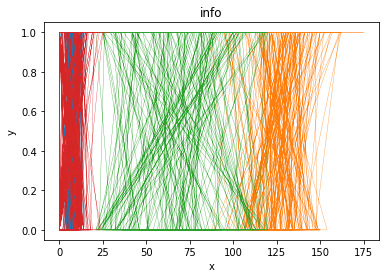

In [37]:
plt.plot(x,y,label='line one',linewidth=0.3)
plt.title('info')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

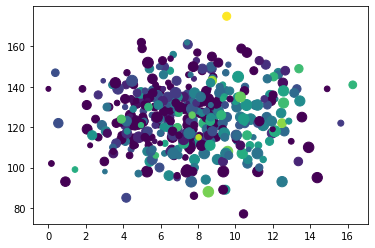

In [38]:
plt.scatter(cd['Sales'],cd['CompPrice'],cd['Income'],cd['Advertising'])
plt.show()

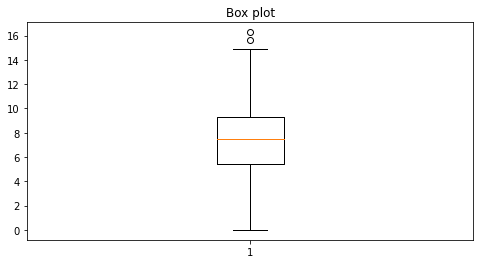

In [40]:
plt.figure(figsize=(8,4))

plt.boxplot(x='Sales', data=cd)
plt.title("Box plot") 

plt.show()

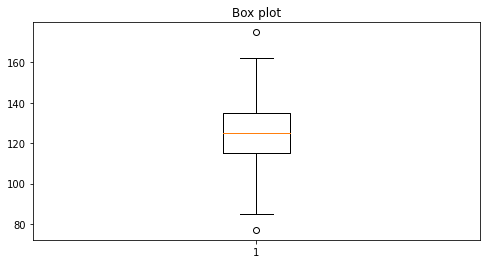

In [41]:
plt.figure(figsize=(8,4))

plt.boxplot(x='CompPrice', data=cd)
plt.title("Box plot") 

plt.show()

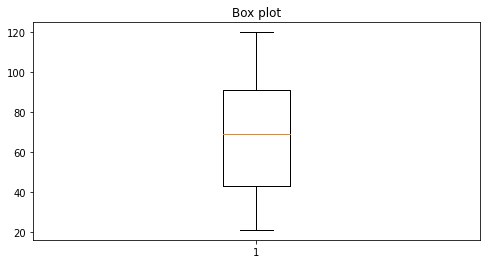

In [42]:
plt.figure(figsize=(8,4))

plt.boxplot(x='Income', data=cd)
plt.title("Box plot") 

plt.show()	

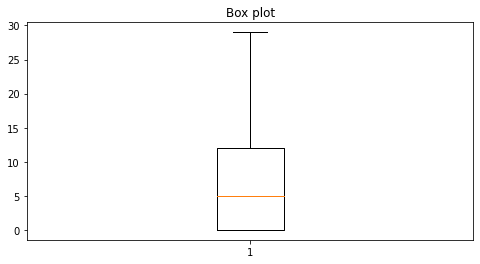

In [43]:
plt.figure(figsize=(8,4))

plt.boxplot(x='Advertising', data=cd)
plt.title("Box plot") 

plt.show()

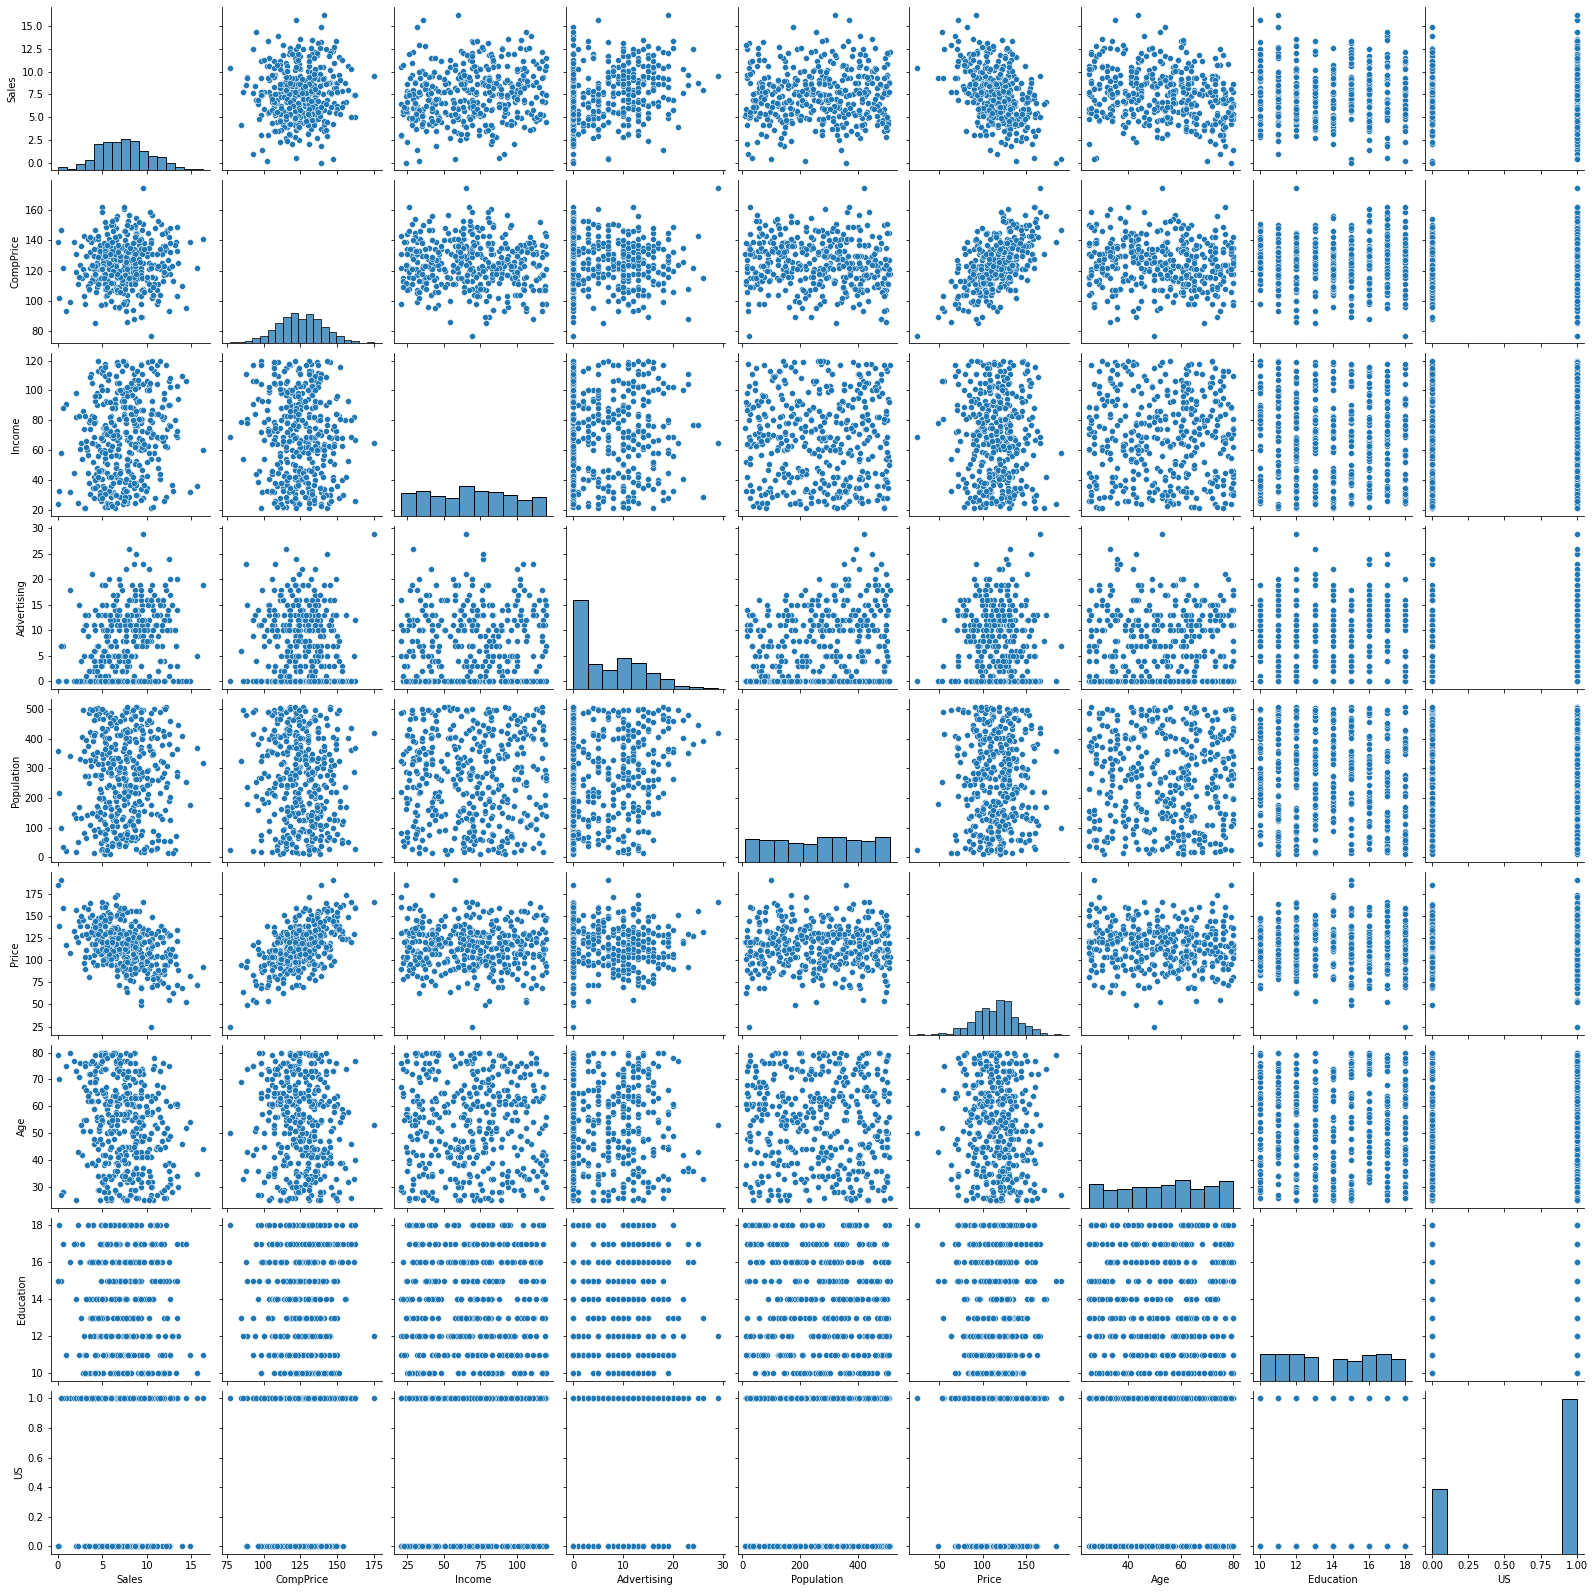

In [55]:
#ploting pairplot
sns.pairplot(data =cd)

In [56]:
cd.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.015419
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.066594
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.037967
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.042035
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.052025
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.047016
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.028479
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.033094
US,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,1.000000


In [44]:
cd["US"].unique()

array([1, 0])

In [45]:
cd.US.value_counts()

1    282
0    118
Name: US, dtype: int64

In [46]:
colnames=list(cd.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [47]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=101)

In [48]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [58]:
y_pred = model.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [62]:
# Accuracy of the model
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6583333333333333


In [63]:
#predicting class for new data
new_data = [[8.9,150,56, 9.1]]
y_pred = model.predict(new_data)
print(y_pred)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [54]:
textrep=tree.export_text(model)
print(textrep)

|--- feature_2 <= 51.50
|   |--- feature_1 <= 108.50
|   |   |--- feature_3 <= 15.00
|   |   |   |--- class: 0
|   |   |--- feature_3 >  15.00
|   |   |   |--- class: 1
|   |--- feature_1 >  108.50
|   |   |--- feature_2 <= 50.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  50.50
|   |   |   |--- class: 0
|--- feature_2 >  51.50
|   |--- feature_1 <= 150.50
|   |   |--- feature_0 <= 7.12
|   |   |   |--- class: 1
|   |   |--- feature_0 >  7.12
|   |   |   |--- class: 1
|   |--- feature_1 >  150.50
|   |   |--- class: 1



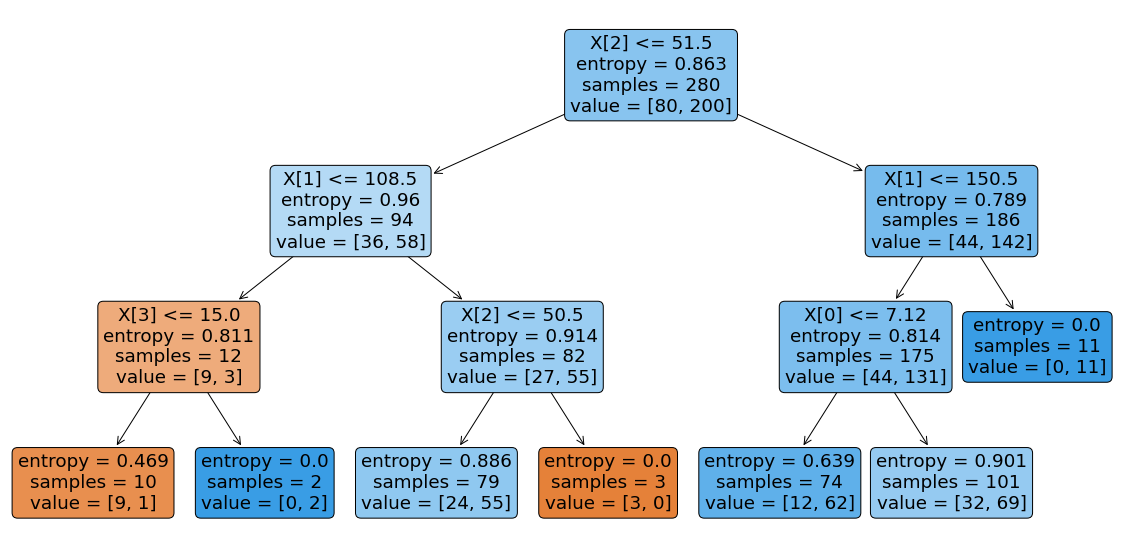

In [64]:
#vizualise decision tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
tree.plot_tree(model,filled=True,rounded=True)
plt.show()


In [65]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    117
0      3
dtype: int64

**BY  GINI**

In [66]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [67]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [68]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.6583333333333333

**Decision Tree Regression**

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
array = cd.values
X = array[:,0:3]
y = array[:,3]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [72]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [73]:
#Find the accuracy
model.score(X_test,y_test)

-1.2787371252177637

# **Q2.**
# **Fraud check**

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [75]:
fraud=pd.read_csv("/content/drive/MyDrive/Assignment/Fraud_check.csv")

In [76]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [77]:
fraud=fraud.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})

In [78]:
fraud.head()



,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [79]:
fraud.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [80]:
fraud['income_range'] = np.where(fraud['Taxable_Income']>=30000, 'Good', 'Risky')
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [81]:
label_encoder = preprocessing.LabelEncoder()
fraud_data = fraud[['Undergrad', 'Marital_Status','Urban']].apply(label_encoder.fit_transform)
fraud_data = fraud_data.rename(columns={'Undergrad':'Undergrad_numeric', 'Marital_Status':'Marital_Status_numeric','Urban':'Urban_numeric'})

In [82]:
fraud_data.head()

,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0


In [83]:
fraud_data = pd.concat([fraud,fraud_data], axis=1, sort=False)
fraud_data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,NO,Single,68833,50047,10,YES,Good,0,2,1
1,YES,Divorced,33700,134075,18,YES,Good,1,0,1
2,NO,Married,36925,160205,30,YES,Good,0,1,1
3,YES,Single,50190,193264,15,YES,Good,1,2,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0


In [84]:
fraud_data.drop(columns={'Undergrad','Marital_Status','Urban','Taxable_Income'},axis=1)

,City_Population,Work_Experience,income_range,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,50047,10,Good,0,2,1
1,134075,18,Good,1,0,1
2,160205,30,Good,0,1,1
3,193264,15,Good,1,2,1
4,27533,28,Good,0,1,0
...,...,...,...,...,...,...
595,39492,7,Good,1,0,1
596,55369,2,Good,1,0,1
597,154058,0,Good,0,0,1
598,180083,17,Good,1,1,0


In [85]:
fraud_data = fraud_data[['City_Population','Work_Experience','Undergrad_numeric','Marital_Status_numeric','Urban_numeric','income_range']]

In [86]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital_Status',
 'Taxable_Income',
 'City_Population',
 'Work_Experience',
 'Urban',
 'income_range']

In [87]:
fraud_data.income_range.value_counts()

Good     476
Risky    124
Name: income_range, dtype: int64

In [88]:
fraud_data.isnull().sum()

City_Population           0
Work_Experience           0
Undergrad_numeric         0
Marital_Status_numeric    0
Urban_numeric             0
income_range              0
dtype: int64

In [89]:
x=fraud_data.iloc[:,0:5]
y=fraud_data['income_range']

In [96]:
x

,City_Population,Work_Experience,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,50047,10,0,2,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,2,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [90]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [91]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [93]:
y_pred = model.predict(x_test)
print(y_pred)

['Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good']


In [94]:
# Accuracy of the model
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.775


In [97]:
#predicting class for new data
new_data = [[15000,33,0,1,2]]
y_pred = model.predict(new_data)
print(y_pred)

['Good']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [98]:
textrep=tree.export_text(model)
print(textrep)

|--- feature_0 <= 63983.00
|   |--- feature_1 <= 23.50
|   |   |--- feature_0 <= 40128.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- feature_0 <= 36940.00
|   |   |   |   |   |--- class: Good
|   |   |   |   |--- feature_0 >  36940.00
|   |   |   |   |   |--- class: Risky
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- feature_0 <= 31494.00
|   |   |   |   |   |--- class: Good
|   |   |   |   |--- feature_0 >  31494.00
|   |   |   |   |   |--- class: Good
|   |   |--- feature_0 >  40128.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: Good
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- feature_0 <= 60278.50
|   |   |   |   |   |--- class: Good
|   |   |   |   |--- feature_0 >  60278.50
|   |   |   |   |   |--- class: Risky
|   |--- feature_1 >  23.50
|   |   |--- class: Good
|--- feature_0 >  63983.00
|   |--- feature_0 <= 64532.50
|   |   |--- class: Risky
|   |--- feature_0 >  64532.50
|   |   |--- feature_0 <= 130296.00
|   |   |   |---

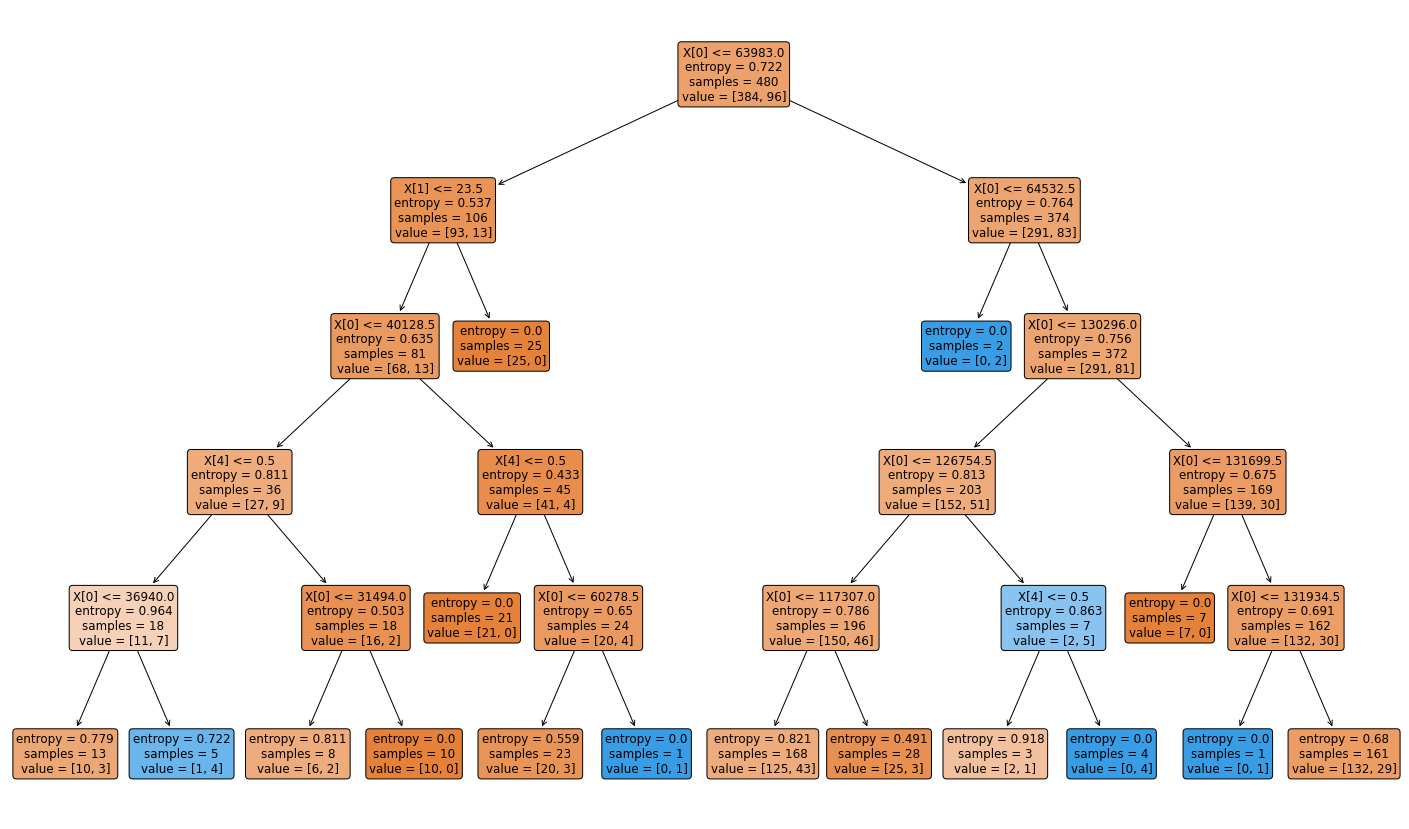

In [101]:
#vizualise decision tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (25,15))
tree.plot_tree(model,filled=True,rounded=True)
plt.show()

In [104]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

Good     117
Risky      3
dtype: int64

In [105]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [106]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
income_range,,
Good,91,1
Risky,26,2


**GINI**

In [107]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [108]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [109]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.775